# Does Incumbency Advantage Exist In Taiwan's Legislator Elections?
> Exploration through regression discontinuity

- toc: true 
- badges: false
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# Incumbency advantage

People usually believe the incumbent candidate has a higher winning rate in the re-election. Does the incumbent effect still exist when we extend it to the party level? That is, whether a candidate has a higher winning probability while the seat/office was won by their party last time.

## Measure the incumbency advantage effect: regression discontinuity

To measure the incumbent effect, Lee [^1] proposed a regression discontinuity design on previous election margins. The design studied the observations near the cut-off, margin equals zero in this case, and saw if there was a significant difference in the winning probability between the samples with its previous margin less than zero, says losing last time, and the samples winning last time. Since only the observations with near zero margin are studied and the margin is so small that it probably won just by chance, whether a party won the previous election can be conisdered as almost randomly assigned. Hence, the difference between the two sides is the effect we are curious about. Lee found the incumbency advantage existed in representative elections in US. Does the same incumbent effect can be found in Taiwan's legislator elections?

[^1]: Lee, David S. "Randomized experiments from non-random selection in US House elections." *Journal of Econometrics* 142.2 (2008): 675-697.

# Taiwan's legislator elections

The legislators are the parliament members at the national level. They can propose general law creation and modification. They also supervise the goverment. The legislators are elected every four year. The candidate

There are 113 seats of legislators in total:

1. **Regional**: 73 seats. Single-member districts.
2. **Party**: 34 seats. Party-list proportional representation voting.
3. **Indigenous**: 6 seats. Single non-transferable voting in multi-member districts, exclusive for persons with indigenous status.

The electoral district and method design has been effective since 2012. The previous elections were hold under multiple-member districts so I didn't include them in the data.

## Two major parties

Most elections in Taiwan are competed by two major parties, KMT and DPP, though there are over one hundred parties regiested and around ten of them are active. KMT is pro-China and relatively consevative while DPP is pro-independent and more progressive.

## KMT's view

Let's start from KMT. The distribution of raw data 

In [26]:
#hide
options(warn=0)
library("tidyverse")
library("rdrobust")
library("scales")
dt <- readr::read_csv("legislatorRD4R.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  name = col_character(),
  DPP_elected = col_logical(),
  KMT_elected = col_logical(),
  DPP_elected_last = col_logical(),
  KMT_elected_last = col_logical()
)

See spec(...) for full column specifications.



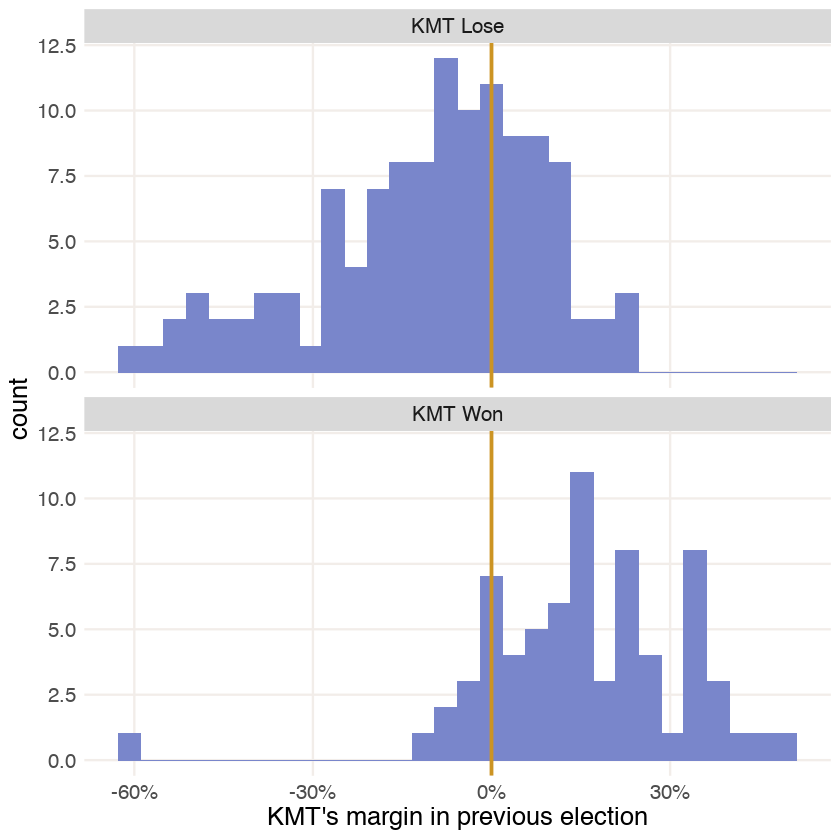

In [55]:
#collapse-hide
dt %>%
filter(!is.na(margin_all_KMT_pos_last)) %>%
mutate(KMT_elected = ifelse(KMT_elected == TRUE, "KMT Won", "KMT Lose")) %>%
ggplot() +
geom_histogram(aes(x = margin_all_KMT_pos_last), fill = "#7986CB", bins = 30) +
geom_vline(xintercept = 0, color = "#CC9423", size = 0.8) +
scale_x_continuous(labels = scales::percent) +
labs(x = "KMT's margin in previous election") +
facet_wrap(~KMT_elected, nrow = 2) +
theme(text = element_text(size=15),
      axis.ticks = element_blank(),
      panel.background = element_rect(fill = NA),
      panel.grid.major = element_line(colour = "#F2EDE9"),
      panel.grid.minor = element_blank())

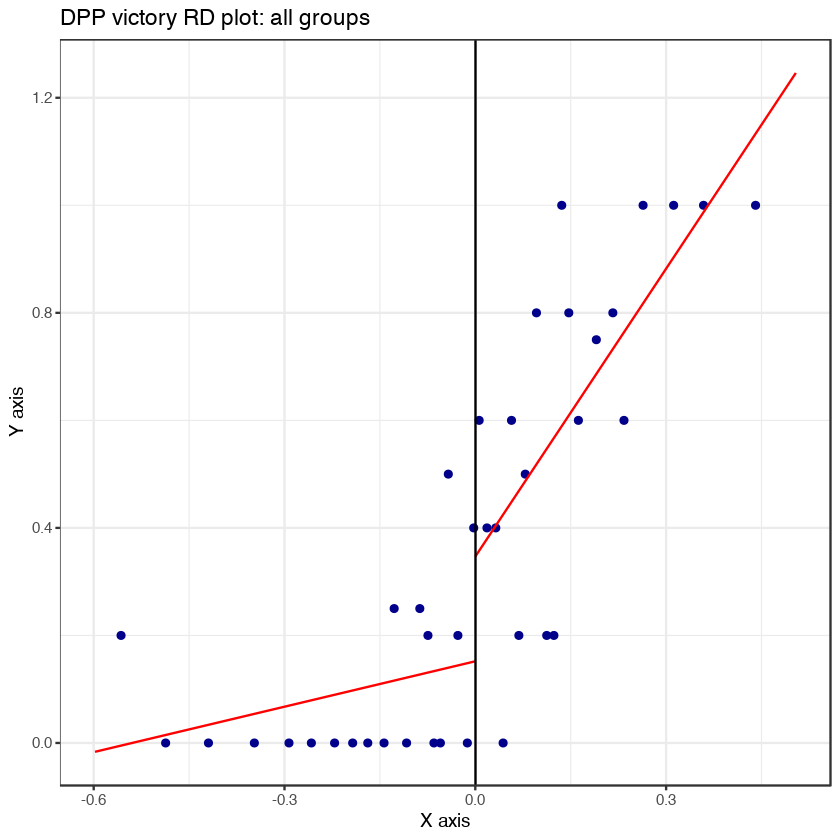

In [14]:
#collapse-hide
Y <- dt$KMT_elected
X <- dt$margin_all_KMT_pos_last
out <- rdplot(Y, X, nbins = c(20, 20), binselect = "qs", p = 1, title = "DPP victory RD plot: all groups")

Call: rdplot

Number of Obs.                  188
Kernel                      Uniform

Number of Obs.                  90             98
Eff. Number of Obs.             90             98
Order poly. fit (p)              1              1
BW poly. fit (h)             0.598          0.504
Number of bins scale             1              1

Bins Selected                    8              5
Average Bin Length           0.075          0.101
Median Bin Length            0.054          0.058

IMSE-optimal bins                8              5
Mimicking Variance bins          9              9

Relative to IMSE-optimal:
Implied scale                1.000          1.000
WIMSE variance weight        0.500          0.500
WIMSE bias weight            0.500          0.500



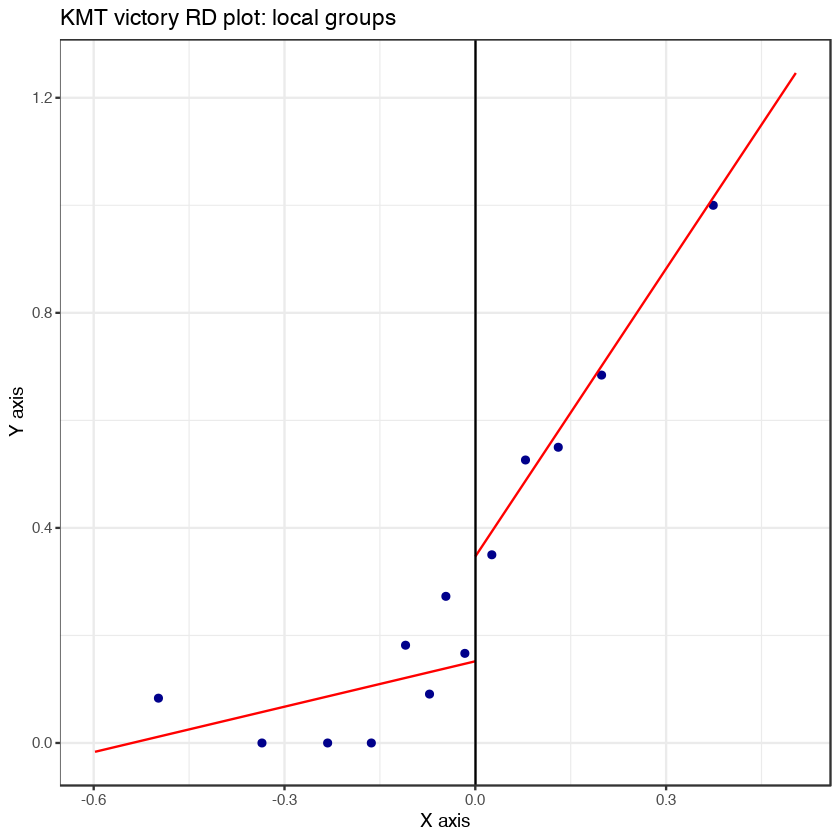

In [15]:
#collapse-hide
out <- rdplot(Y, X,  binselect = "qs", p = 1, title = "KMT victory RD plot: local groups")
summary(out)

## DPP's view

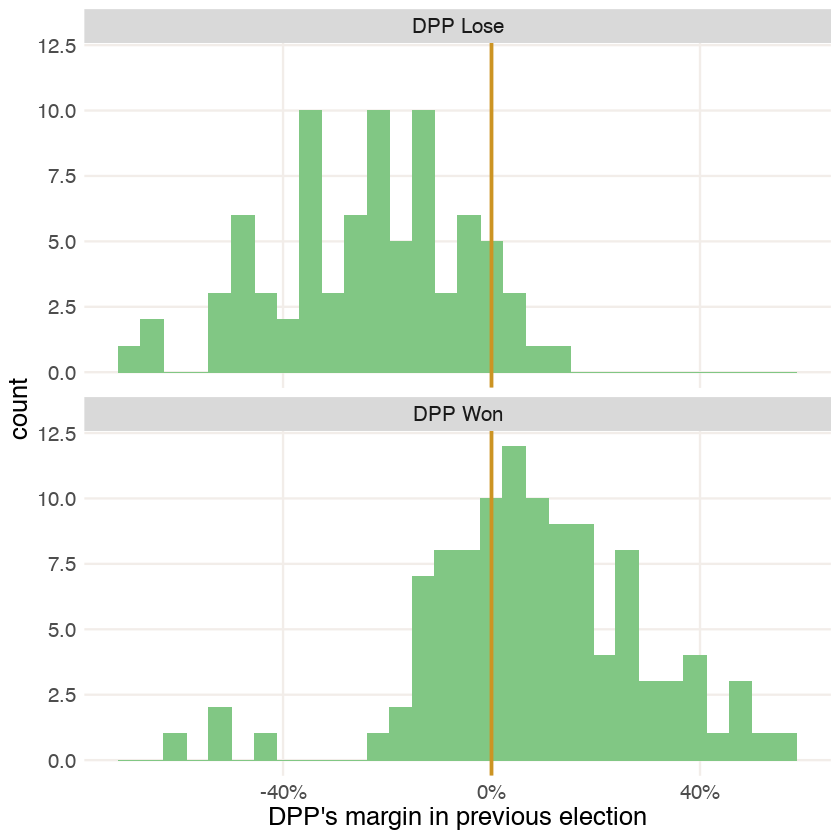

In [58]:
#collapse-hide
dt %>%
filter(!is.na(margin_all_DPP_pos_last)) %>%
mutate(DPP_elected = ifelse(DPP_elected == TRUE, "DPP Won", "DPP Lose")) %>%
ggplot() +
geom_histogram(aes(x = margin_all_DPP_pos_last), fill = "#81C784", bins = 30) +
geom_vline(xintercept = 0, color = "#CC9423", size = 0.8) +
scale_x_continuous(labels = scales::percent) +
labs(x = "DPP's margin in previous election") +
facet_wrap(~DPP_elected, nrow = 2) +
theme(text = element_text(size = 15),
      axis.ticks = element_blank(),
      panel.background = element_rect(fill = NA),
      panel.grid.major = element_line(colour = "#F2EDE9"),
      panel.grid.minor = element_blank())

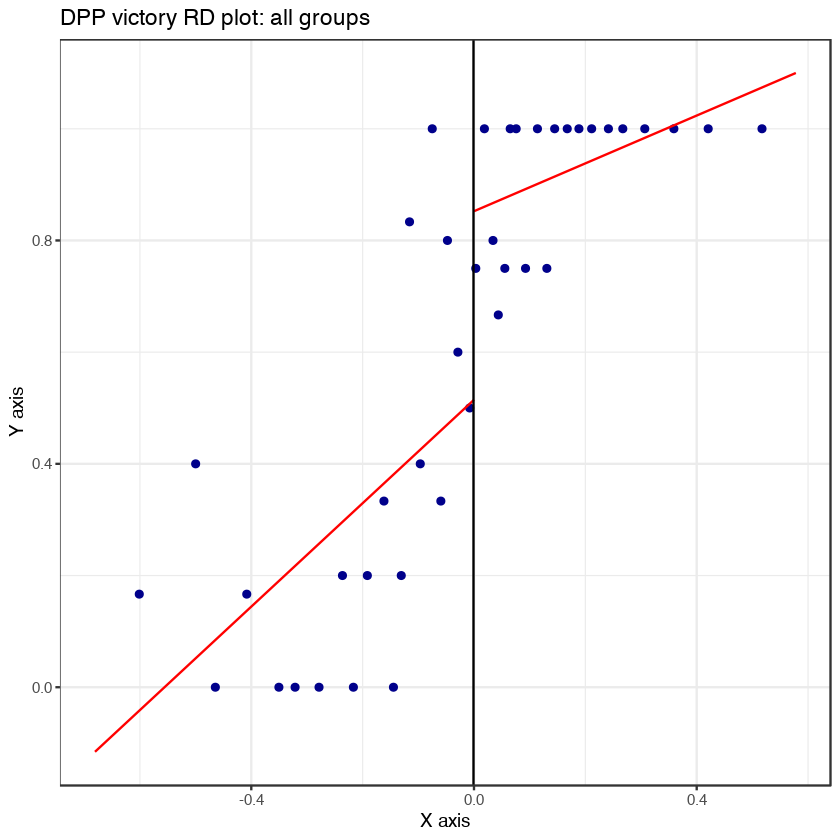

In [17]:
#collapse-hide
Y <- dt$DPP_elected
X <- dt$margin_all_DPP_pos_last
out <- rdplot(Y, X, nbins = c(20, 20), binselect = "qs", p = 1, title = "DPP victory RD plot: all groups")

Call: rdplot

Number of Obs.                  188
Kernel                      Uniform

Number of Obs.                 107             81
Eff. Number of Obs.            107             81
Order poly. fit (p)              1              1
BW poly. fit (h)             0.681          0.578
Number of bins scale             1              1

Bins Selected                   10              3
Average Bin Length           0.068          0.193
Median Bin Length            0.047          0.128

IMSE-optimal bins               10              3
Mimicking Variance bins         11              8

Relative to IMSE-optimal:
Implied scale                1.000          1.000
WIMSE variance weight        0.500          0.500
WIMSE bias weight            0.500          0.500



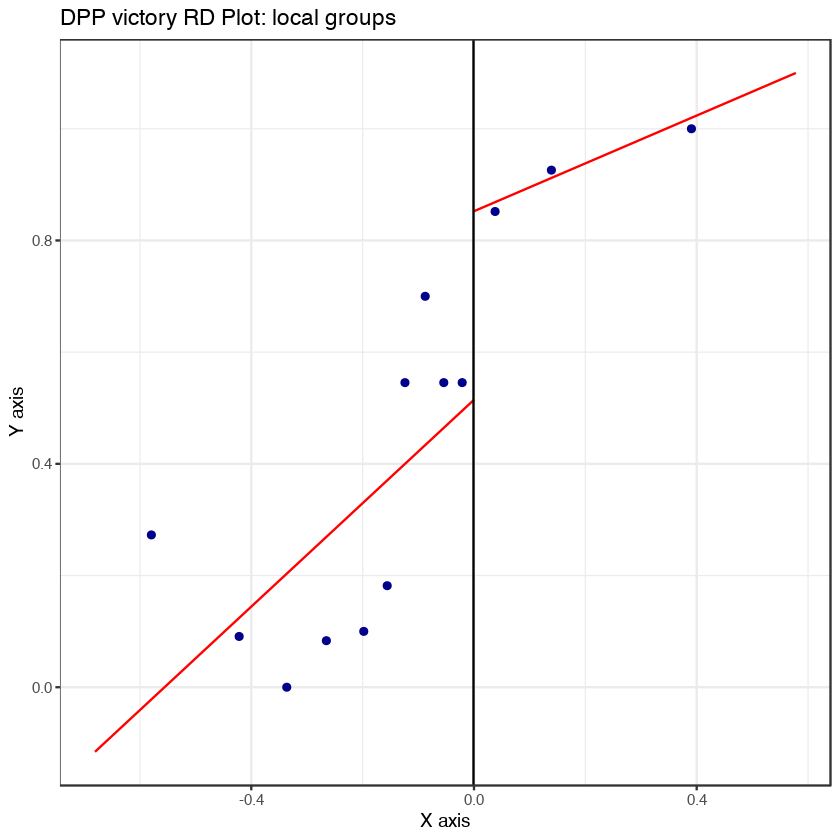

In [18]:
#collapse-hide
out <- rdplot(Y, X, binselect = "qs", p = 1, title = "DPP victory RD Plot: local groups")
summary(out)